# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import imblearn.under_sampling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Read Data

In [3]:
data = pd.read_csv("heart_2020_cleaned.csv")

In [4]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
data.describe(include="all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [6]:
for feature in data.columns:
    print(feature)
    print(data[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 


In [7]:
data.dtypes

In [8]:
obj_data = data.select_dtypes(include=['object']).copy()
obj_data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [11]:
float_data = data.select_dtypes(include=['float64']).copy()
float_data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


# Data Visualization

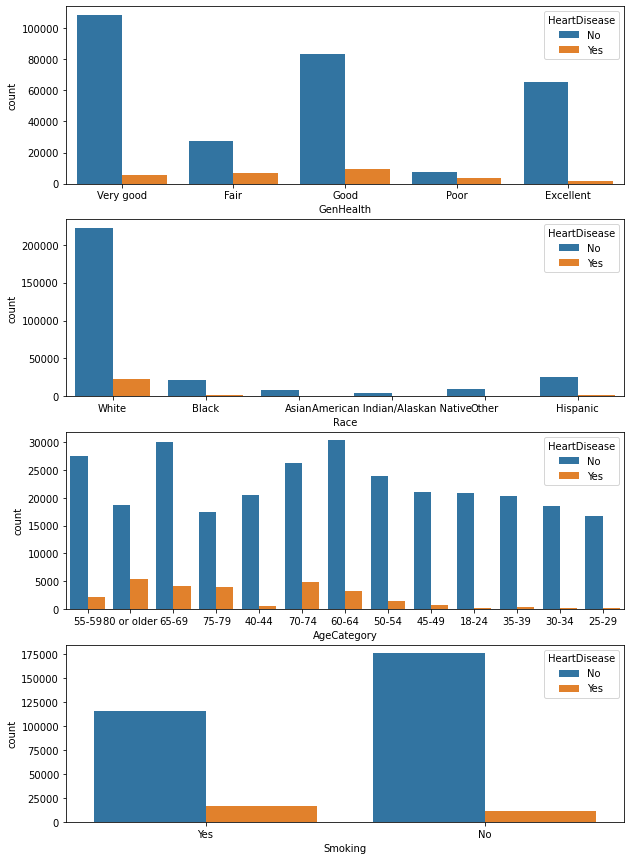

In [13]:

f,ax = plt.subplots(4,1,figsize=(10,15))

sns.countplot(data=data,x='GenHealth',hue='HeartDisease',ax=ax[0])
sns.countplot(data=data,x='Race',hue='HeartDisease',ax=ax[1])
sns.countplot(data=data,x='AgeCategory',hue='HeartDisease',ax=ax[2])
sns.countplot(data=data,x='Smoking',hue='HeartDisease',ax=ax[3])

# Transformation for categorical value to Numerical value

In [28]:
num = {"No": 0, "Yes": 1}
num_diabetic = {"No": 0, "Yes": 1,"No, borderline diabetes": 2, "Yes (during pregnancy)": 3,}
sex = {"Female": 0, "Male": 1}
health = {"Excellent": 0, "Very good": 1, "Good": 2, "Fair": 3, "Poor": 4}
age = {"18-24": 0, "25-29": 1, "30-34": 2, "35-39": 3, "40-44": 4, "45-49": 5, "50-54": 6,
       "55-59": 7, "60-64": 8, "65-69": 9, "70-74": 10, "75-79": 11, "80 or older" : 12,
       }

cleanup_nums = {"HeartDisease":num,
                "Smoking":num, 
                "AlcoholDrinking":num,
                "Stroke":num, 
                "DiffWalking":num,
                "Diabetic":num_diabetic, 
                "PhysicalActivity":num,
                "Asthma":num, 
                "KidneyDisease":num,
                "SkinCancer":num,
                "Sex":sex,
                "AgeCategory":age,
                "GenHealth":health, 
                }

In [15]:
obj_data = obj_data.replace(cleanup_nums)
obj_data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,7,White,1,1,1,1,0,1
1,0,0,0,1,0,0,12,White,0,1,1,0,0,0
2,0,1,0,0,0,1,9,White,1,1,3,1,0,0
3,0,0,0,0,0,0,11,White,0,0,2,0,0,1
4,0,0,0,0,1,0,4,White,0,1,1,0,0,0


# Link Tables

In [31]:
data = pd.concat([obj_data, float_data], axis=1)
data.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0,1,0,0,0,0,7,White,1,1,1,1,0,1,16.60,3.0,30.0,5.0
1,0,0,0,1,0,0,12,White,0,1,1,0,0,0,20.34,0.0,0.0,7.0
2,0,1,0,0,0,1,9,White,1,1,3,1,0,0,26.58,20.0,30.0,8.0
3,0,0,0,0,0,0,11,White,0,0,2,0,0,1,24.21,0.0,0.0,6.0
4,0,0,0,0,1,0,4,White,0,1,1,0,0,0,23.71,28.0,0.0,8.0
5,1,1,0,0,1,0,11,Black,0,0,3,0,0,0,28.87,6.0,0.0,12.0
6,0,0,0,0,0,0,10,White,0,1,3,1,0,1,21.63,15.0,0.0,4.0
7,0,1,0,0,1,0,12,White,1,0,2,1,0,0,31.64,5.0,0.0,9.0
8,0,0,0,0,0,0,12,White,2,0,3,0,1,0,26.45,0.0,0.0,5.0
9,0,0,0,0,1,1,9,White,0,1,2,0,0,0,40.69,0.0,0.0,10.0


In [33]:
del data['Race']

KeyError: KeyError: 'Race'

In [34]:
data.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0,1,0,0,0,0,7,1,1,1,1,0,1,16.60,3.0,30.0,5.0
1,0,0,0,1,0,0,12,0,1,1,0,0,0,20.34,0.0,0.0,7.0
2,0,1,0,0,0,1,9,1,1,3,1,0,0,26.58,20.0,30.0,8.0
3,0,0,0,0,0,0,11,0,0,2,0,0,1,24.21,0.0,0.0,6.0
4,0,0,0,0,1,0,4,0,1,1,0,0,0,23.71,28.0,0.0,8.0
5,1,1,0,0,1,0,11,0,0,3,0,0,0,28.87,6.0,0.0,12.0
6,0,0,0,0,0,0,10,0,1,3,1,0,1,21.63,15.0,0.0,4.0
7,0,1,0,0,1,0,12,1,0,2,1,0,0,31.64,5.0,0.0,9.0
8,0,0,0,0,0,0,12,2,0,3,0,1,0,26.45,0.0,0.0,5.0
9,0,0,0,0,1,1,9,0,1,2,0,0,0,40.69,0.0,0.0,10.0


# Data Preprocessing before Undersampling 

In [35]:
target = 'HeartDisease'

In [36]:
X = data.loc[:, data.columns != target ]

In [37]:
Y = data.loc[:, data.columns == target ]

In [38]:
x_train, x_test, y_train, y_test, = train_test_split(X, Y, test_size=0.33 , random_state=42)

0    292422
1     27373
Name: HeartDisease, dtype: int64


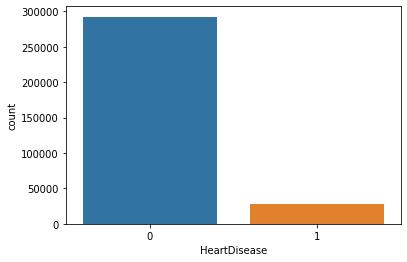

In [39]:
ax = sns.countplot(x=target, data=data)
print(data[target].value_counts())

# Modelling before Undersampling 

In [40]:

lr = LogisticRegression(solver='lbfgs', max_iter=1000 ).fit(x_train, y_train.values.ravel())

In [24]:
y_test_perd = lr.predict(x_test)

In [25]:
print(classification_report(y_test,y_test_perd))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     96385
           1       0.52      0.10      0.17      9148

    accuracy                           0.91    105533
   macro avg       0.72      0.55      0.56    105533
weighted avg       0.89      0.91      0.89    105533



# Undersampling 

In [41]:
minority_class_len = len(data[data[target] == 1])

In [42]:
len(data[data[target] == 1])

27373

In [43]:
minority_class_indices = data[data[target] == 0].index
print(minority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      6,      7,      8,
                 9,     11,
            ...
            319783, 319784, 319785, 319787, 319788, 319789, 319791, 319792,
            319793, 319794],
           dtype='int64', length=292422)


In [44]:
rondom = np.random.choice(minority_class_indices, minority_class_len, replace=False)
print(len(rondom))

27373


In [45]:
minority_class_indices = data[data[target] == 1].index
print(minority_class_indices)

Int64Index([     5,     10,     35,     42,     43,     45,     77,     78,
               101,    127,
            ...
            319708, 319721, 319739, 319758, 319761, 319765, 319767, 319781,
            319786, 319790],
           dtype='int64', length=27373)


In [46]:
u_s_i = np.concatenate([minority_class_indices, rondom ])

In [47]:
u_s = data.loc[u_s_i]

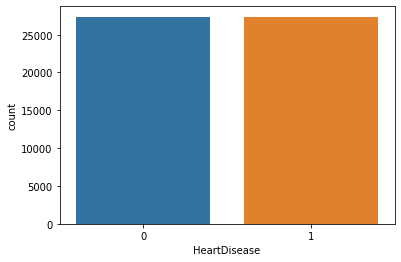

In [48]:
sns.countplot(x=target, data= u_s)

# Modelling after Undersampling 

In [49]:
X = u_s.loc[:, data.columns != target ]
Y = u_s.loc[:, data.columns == target ]
x_train, x_test, y_train, y_test, = train_test_split(X, Y, test_size=0.33 , random_state=42)
lr = LogisticRegression(solver='lbfgs', max_iter=1000 ).fit(x_train, y_train.values.ravel())
y_test_perd = lr.predict(x_test)
print(classification_report(y_test,y_test_perd))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      9027
           1       0.76      0.79      0.77      9040

    accuracy                           0.77     18067
   macro avg       0.77      0.77      0.77     18067
weighted avg       0.77      0.77      0.77     18067

